In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

xls = pd.ExcelFile("../Data/Data_Tables_LGA_Recorded_Offences_Year_Ending_September_2021.xlsx")
df = pd.read_excel (xls,'Table 01')

In [28]:
df.head(30)

,Year,Year ending,Police Region,Local Government Area,Offence Count,"Rate per 100,000 population"
0,2021,September,1 North West Metro,Banyule,7773,5913.816707
1,2021,September,1 North West Metro,Brimbank,17741,8746.256173
2,2021,September,1 North West Metro,Darebin,13379,8114.424138
3,2021,September,1 North West Metro,Hobsons Bay,5769,5925.844216
4,2021,September,1 North West Metro,Hume,18882,7689.258292
5,2021,September,1 North West Metro,Maribyrnong,8640,9198.897080
6,2021,September,1 North West Metro,Melbourne,34949,20868.034593
7,2021,September,1 North West Metro,Melton,12550,6979.250087
8,2021,September,1 North West Metro,Moonee Valley,7521,5750.404534
9,2021,September,1 North West Metro,Moreland,12128,6485.096509


## ANALYSIS OFFENCES "Rate per 100k population" OVER 10 YEARS FOR EACH POLICE REGION

In [29]:
fc = df.loc[df['Local Government Area']=='Total',['Year','Police Region','Rate per 100,000 population']]
fc.shape

(60, 3)

In [30]:
c = fc.dropna(axis=0, how='any')
c.shape

(40, 3)

In [31]:
cdf = c.groupby('Year')['Rate per 100,000 population'].agg(['sum','mean','median',np.var,np.std])
cdf.head(10)

,sum,mean,median,var,std
Year,,,,,
2012,28472.584487,7118.146122,6861.174448,2.279687e+06,1509.863348
2013,29544.407874,7386.101969,7293.489657,1.867053e+06,1366.401465
2014,30364.455897,7591.113974,7395.800586,1.605980e+06,1267.272685
2015,31868.058592,7967.014648,7927.914287,1.545225e+06,1243.070884
2016,34796.251878,8699.062970,8726.451950,1.534538e+06,1238.764858
2017,32464.399004,8116.099751,8241.431021,9.059161e+05,951.796231
2018,31094.412407,7773.603102,7806.596389,1.068817e+06,1033.836292
2019,31803.162301,7950.790575,8016.721796,6.286163e+05,792.853258
2020,32536.654911,8134.163728,8161.627085,6.520510e+05,807.496743


In [32]:
Total = c.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
Total.describe()

count       10.000000
mean     31240.427536
std       1856.795180
min      28472.584487
25%      29749.419880
50%      31448.787354
75%      32315.313901
max      34796.251878
Name: Rate per 100,000 population, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

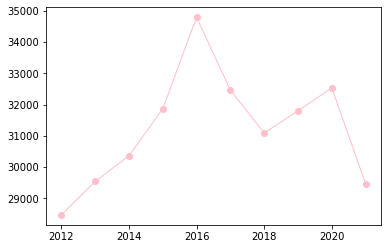

In [33]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="pink", linewidth=1, label="Total")
plt.show

In [34]:
NorthWestMetro = c[c['Police Region']=='1 North West Metro']
del NorthWestMetro['Police Region']
NorthWestMetro = NorthWestMetro.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
NorthWestMetro

Year
2012     9188.185680
2013     9145.108558
2014     9311.272543
2015     9523.017359
2016    10173.603007
2017     9072.230728
2018     8904.392385
2019     8727.002472
2020     9070.984126
2021     8067.292735
Name: Rate per 100,000 population, dtype: float64

In [35]:
Eastern = c[c['Police Region']=='2 Eastern']
del Eastern['Police Region']
Eastern= Eastern.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
Eastern

Year
2012    5562.049911
2013    5812.320002
2014    6261.582182
2015    6489.212658
2016    7169.744970
2017    6909.306234
2018    6576.827243
2019    7042.716237
2020    7142.416615
2021    6784.997475
Name: Rate per 100,000 population, dtype: float64

In [36]:
SouthernMetro = c[c['Police Region']=='3 Southern Metro']
del SouthernMetro['Police Region']
SouthernMetro = SouthernMetro.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
SouthernMetro

Year
2012    6845.459595
2013    7212.523775
2014    7309.067521
2015    7810.494457
2016    8515.462682
2017    7844.067647
2018    7309.948394
2019    7542.353214
2020    7945.467768
2021    6786.368797
Name: Rate per 100,000 population, dtype: float64

In [37]:
Western = c[c['Police Region']=='4 Western']
del Western['Police Region']
Western = Western.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
Western

Year
2012    6876.889300
2013    7374.455539
2014    7482.533651
2015    8045.334118
2016    8937.441219
2017    8638.794395
2018    8303.244385
2019    8491.090378
2020    8377.786403
2021    7821.228998
Name: Rate per 100,000 population, dtype: float64

In [38]:
Justice = c[c['Police Region']=='Justice Institutions and Immigration Facilities']
del Justice['Police Region']
Justice = Justice.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
Justice

Series([], Name: Rate per 100,000 population, dtype: float64)

<function matplotlib.pyplot.show(close=None, block=None)>

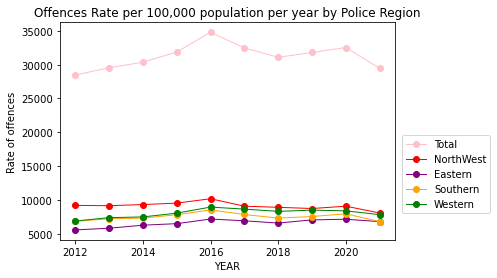

<Figure size 57600x43200 with 0 Axes>

In [39]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="pink", linewidth=1, label="Total")
plt.plot(x,NorthWestMetro, marker="o", color="red", linewidth=1, label="NorthWest")
plt.plot(x,Eastern, marker="o", color="purple", linewidth=1, label="Eastern")
plt.plot(x,SouthernMetro, marker="o", color="orange", linewidth=1, label="Southern")
plt.plot(x,Western, marker="o", color="green", linewidth=1, label="Western")
#plt.plot(x,Justice, marker="o", color="blue", linewidth=1, label="Facility")
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.1))
plt.title("Offences Rate per 100,000 population per year by Police Region")
plt.xlabel("YEAR")
plt.ylabel("Rate of offences")
plt.figure(figsize=(800,600))
plt.show